<a href="https://colab.research.google.com/github/jlevisimas/NF3-BIG-DATA-Joao-Levi-dos-Santos-Simas/blob/main/trabalhofinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1-

import pandas as pd
import re
import requests
import io

url = "https://www.w3resource.com/python-exercises/pandas/filter/world_alcohol.csv"
data = requests.get(url).content

df_bebidas = pd.read_csv(io.BytesIO(data))

df_bebidas.head

<bound method NDFrame.head of     Year       WHO region                                Country  \
0   1986  Western Pacific                               Viet Nam   
1   1986         Americas                                Uruguay   
2   1985           Africa                           Cte d'Ivoire   
3   1986         Americas                               Colombia   
4   1987         Americas                  Saint Kitts and Nevis   
..   ...              ...                                    ...   
95  1984           Africa                                  Niger   
96  1985           Europe                             Luxembourg   
97  1984  South-East Asia                              Indonesia   
98  1984           Africa                      Equatorial Guinea   
99  1985  South-East Asia  Democratic People's Republic of Korea   

   Beverage Types  Display Value  
0            Wine           0.00  
1           Other           0.50  
2            Wine           1.62  
3            

In [3]:
# 1- a) Agrupe os dados por tipo de bebidas

tipos_bebidas = df_bebidas.groupby(["Beverage Types"], group_keys = True).apply(lambda x: x)

tipos_bebidas

Year       WHO region  \
Beverage Types                             
Beer           3   1986         Americas   
               4   1987         Americas   
               11  1989         Americas   
               12  1985  Western Pacific   
               17  1989           Africa   
...                 ...              ...   
Wine           90  1989           Africa   
               96  1985           Europe   
               97  1984  South-East Asia   
               98  1984           Africa   
               99  1985  South-East Asia   

                                                 Country Beverage Types  \
Beverage Types                                                            
Beer           3                                Colombia           Beer   
               4                   Saint Kitts and Nevis           Beer   
               11                              Guatemala           Beer   
               12       Lao People's Democratic Republic           Beer   
               17                             Seychelles           Beer   
...                                                  ...            ...   
Wine           90                                 Malawi           Wine   
               96                             Luxembourg           Wine   
               97                              Indonesia           Wine   
               98                      Equatorial Guinea           Wine   
               99  Democratic People's Republic of Korea           Wine   

                   Display Value  
Beverage Types                    
Beer           3            4.27  
               4            1.98  
               11           0.62  
               12           0.00  
               17           2.23  
...                          ...  
Wine           90           0.01  
               96           7.38  
               97           0.00  
               98           0.00  
               99           0.00  

[100 rows x 5 columns]

In [4]:
# 1- b) Agrupe os dados por Região e por Ano;
agrup_regiao_ano = tipos_bebidas.groupby(["WHO region", "Year"], group_keys = True).apply(lambda x: x)

agrup_regiao_ano

Year       WHO region  \
WHO region      Year Beverage Types                             
Africa          1984 Beer           19  1984           Africa   
                     Other          9   1984           Africa   
                                    95  1984           Africa   
                     Wine           98  1984           Africa   
                1985 Beer           76  1985           Africa   
...                                      ...              ...   
Western Pacific 1985 Spirits        14  1985  Western Pacific   
                1986 Wine           0   1986  Western Pacific   
                                    31  1986  Western Pacific   
                1987 Beer           28  1987  Western Pacific   
                     Wine           56  1987  Western Pacific   

                                                                 Country  \
WHO region      Year Beverage Types                                        
Africa          1984 Beer           19                             Kenya   
                     Other          9                            Nigeria   
                                    95                             Niger   
                     Wine           98                 Equatorial Guinea   
                1985 Beer           76                           Comoros   
...                                                                  ...   
Western Pacific 1985 Spirits        14                          Viet Nam   
                1986 Wine           0                           Viet Nam   
                                    31  Micronesia (Federated States of)   
                1987 Beer           28                          Viet Nam   
                     Wine           56                          Viet Nam   

                                       Beverage Types  Display Value  
WHO region      Year Beverage Types                                   
Africa          1984 Beer           19           Beer           1.08  
                     Other          9           Other           6.10  
                                    95          Other           0.00  
                     Wine           98           Wine           0.00  
                1985 Beer           76           Beer           0.02  
...                                               ...            ...  
Western Pacific 1985 Spirits        14        Spirits           0.05  
                1986 Wine           0            Wine           0.00  
                                    31           Wine           0.00  
                1987 Beer           28           Beer           0.11  
                     Wine           56           Wine           0.00  

[100 rows x 5 columns]

In [5]:
# 1- c) Seção de Contagens: Contar a ocorrência de Regiões, de Países e a soma da coluna de valorespor Bebida.

count = df_bebidas.loc[:, ["WHO region", "Country"]].groupby("WHO region").value_counts()
sum_by_beverage = df_bebidas.loc[:, ["Display Value"]].sum()

print(f"ocorrência de Regiões e Países: \n\n\n {count}")
print("|||||||||||||||||||||||||||||||||||||||||||||||")
print(f"ocorrência de  Países: \n\n\\n {sum_by_beverage}")

ocorrência de Regiões e Países: 


 WHO region       Country                         
Africa           Mauritius                           2
                 Mauritania                          2
                 Malawi                              2
                 Madagascar                          2
                 Comoros                             2
                                                    ..
Western Pacific  Viet Nam                            4
                 Papua New Guinea                    1
                 Micronesia (Federated States of)    1
                 Lao People's Democratic Republic    1
                 China                               1
Length: 80, dtype: int64
|||||||||||||||||||||||||||||||||||||||||||||||
ocorrência de  Países: 

\n Display Value    104.79
dtype: float64


Média, Moda e Mediana coluna valores agrupado por tipo de bebidas:


\                Display Value                          
                        mean               mode median
Beverage Types                                        
Beer                    1.48                0.0   0.66
Other                   0.65                0.0   0.00
Spirits                 1.47  [0.0, 0.01, 3.06]   1.62
Wine                    0.87                0.0   0.04


 
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||



Descrição estatistica da coluna de valores agrupado por tipo de bebidas :


\                Display Value                                   
                       count mean  std  min  25%  50%  75%  max
Beverage Types                                                 
Beer                    24.0  1.0  2.0  0.0  0.0  1.0  2.0  7.0
Other                   23.0  1.0  2.0  0.0  0.0  0.0  0.0  6.0
Spirits                 21.0  1.0  1.0  0.0  0.0  2.0  2.0  5.0
Wine   

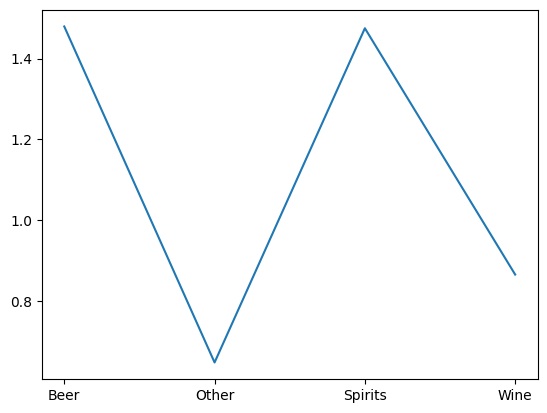

In [ ]:
# 1- d) Realize análises estatísticas da coluna dos valores: Média, Moda, Mediana, Estatística Descritiva e Gráfico de comparação dos valores agrupados por tipo de bebida.
import matplotlib.pyplot as plt

insights = df_bebidas.loc[:, ["Beverage Types", "Display Value"]].groupby("Beverage Types").agg(["mean", pd.Series.mode,"median"])
e_descrita = df_bebidas.loc[:, ["Beverage Types", "Display Value"]].groupby("Beverage Types").agg("describe")
graf_date = df_bebidas.loc[:, ["Beverage Types", "Display Value"]].groupby("Beverage Types").mean()
grafico = plt.plot(graf_date)

print(f"Média, Moda e Mediana coluna valores agrupado por tipo de bebidas:\n\n\n\ {round(insights,2)}\n\n\n ")
print("|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||\n\n\n")
print(f"Descrição estatistica da coluna de valores agrupado por tipo de bebidas :\n\n\n\ {round(e_descrita)}\n\n\n   ")
grafico

In [ ]:
# 1- e) Mostre resultados de acordo com alguns critérios:
# i. Mostrar a coluna de bebidas do ano de 1985.
# ii. Mostrar a coluna de Região com valores acima de 4.
import pandas as pd

df_bebidas = pd.read_csv("/content/world_alcohol.csv")

bebidas_1985 = df_bebidas.loc[df_bebidas["Year"] == 1985, "Beverage Types"]
maior_4 = df_bebidas.loc[df_bebidas["Display Value"] > 4, ["WHO region"]]

print(f"Colunas de bebidas no ano de 1985: \n\n\n {bebidas_1985}\n\n\n")
print(f"Coluna de região com valores superior a 4: \n\n\n {maior_4}\n\n\n")


Colunas de bebidas no ano de 1985: 


 2        Wine
7     Spirits
12       Beer
14    Spirits
24      Other
26       Wine
33      Other
35    Spirits
44      Other
50      Other
63      Other
71      Other
76       Beer
77    Spirits
80      Other
81       Wine
85       Wine
94    Spirits
96       Wine
99       Wine
Name: Beverage Types, dtype: object



Coluna de região com valores superior a 4: 


    WHO region
3    Americas
9      Africa
21   Americas
30     Africa
41     Europe
57     Europe
91     Europe
96     Europe





In [6]:
#2 Dataframe
import pandas as pd

# URL do arquivo no GitHub
url = "https://raw.githubusercontent.com/jlevisimas/NF3-BIG-DATA-Joao-Levi-dos-Santos-Simas/main/cursos-prouni.csv"
prouni = pd.read_csv(url)
(prouni.head())


,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,NaN,NaN,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,NaN,NaN
1,Bacharelado,Noturno,9836.40,1.0,NaN,NaN,NaN,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,NaN,NaN,NaN
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,NaN,NaN,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,NaN,NaN
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26


In [7]:
#2- a) Efetuar a limpeza das colunas de notas: onde tiver NaN (Not a Number), substituir por 0,0
prouni = pd.read_csv(url)
prouni = prouni.fillna(0.0)

prouni

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,cidade_filtro,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,NTAwMjAwNDAyNzA0,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,MzUxNTA2MTUwMzA4,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,MjMwNDAxODA0MTAz,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,MTIwMjAwNDAwNDAx,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,Licenciatura,Curso a Distância,149.00,1.0,0.0,0.0,0.0,994312865605,Sociologia,Paraiso do Tocantins,TO,MTcwMTAwNDE2MTA5,Universidade Paulista - UNIP,PARAISO DO TOCANTINS - Centro,9943,Sociologia,502.36,0.00,0.00,0.00
41443,Tecnológico,Curso a Distância,144.00,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,MzUxNTA2MzUxMDA5,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.00,450.00,450.00
41444,Tecnológico,Vespertino,139.00,1.0,0.0,0.0,0.0,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,NTMwMTAwMTAwMTA4,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,0.00,0.00,0.00
41445,Bacharelado,Curso a Distância,139.00,1.0,0.0,0.0,0.0,96781210935,Serviço Social,Vitoria,ES,MzIwMzAwOTA1MzA5,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,0.00,0.00,0.00


In [8]:
#2- b)  Agrupe os dados pelo grau (Bacharelado, Licenciatura, etc)
grau_grupo = prouni.groupby('grau').mean()[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']]

grau_grupo

<ipython-input-8-f7b940a3fc61>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grau_grupo = prouni.groupby('grau').mean()[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']]


,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
grau,,,,
Bacharelado,500.687570,302.143202,218.539330,80.377137
Licenciatura,418.241645,182.920068,203.993863,60.895490
Tecnológico,404.593982,154.569393,195.923215,55.503877


In [ ]:
#2- c) Agrupe os dados pelos cursos de Matemática, Medicina e Pedagogia.
cursos_selecionados = ['Matemática', 'Medicina', 'Pedagogia']
df_cursos = prouni[prouni['curso_busca'].isin(cursos_selecionados)]

grupo_cursos = df_cursos.pivot_table(index='curso_busca', values=['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas'], aggfunc='mean')

grupo_cursos

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
curso_busca,,,,
Matemática,385.913414,85.325967,227.258630,54.775912
Medicina,737.457097,637.154677,144.067581,122.805968
Pedagogia,497.657237,310.695444,168.579311,90.339593


In [ ]:
#2- d) Agrupe os dados por Estado e obtenha a média de notas de corte por Estado
grupo_estado = prouni.groupby('uf_busca')['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas'].mean()

grupo_estado

<ipython-input-115-5b9aca1f42af>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grupo_estado = prouni.groupby('uf_busca')['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas'].mean()


,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
uf_busca,,,,
AC,458.099901,156.102463,377.265517,212.541084
AL,501.155719,330.490703,157.449541,68.363425
AM,469.471748,260.839068,143.712308,15.045921
AP,463.846758,255.750228,187.748402,26.521826
BA,450.464327,173.424495,236.860926,82.537541
CE,466.679485,303.281814,253.300637,99.468995
DF,500.669690,253.512719,214.898589,116.702747
ES,489.735248,272.410255,247.212582,118.716509
GO,451.565133,257.732034,196.332582,83.961017


In [9]:
#2- e) Agrupe os dados pelos cursos Tecnológicos
grupo_cursos_tecnologicos = prouni[prouni['grau'] == 'Tecnológico'].groupby('curso_busca').mean()[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']]
grupo_cursos_tecnologicos

<ipython-input-9-4ceff23f6f51>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grupo_cursos_tecnologicos = prouni[prouni['grau'] == 'Tecnológico'].groupby('curso_busca').mean()[['nota_integral_ampla', 'nota_integral_cotas', 'nota_parcial_ampla', 'nota_parcial_cotas']]


,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
curso_busca,,,,
Agroindústria,570.520000,524.800000,465.540000,484.920000
Agronegócio,457.151748,117.560559,134.881259,57.673846
Agropecuária,579.020000,0.000000,0.000000,0.000000
Alimentos,558.400000,0.000000,411.900000,257.505000
Análise e Desenvolvimento de Sistemas,411.514782,149.430020,224.649960,47.998770
...,...,...,...,...
Tecnólogo em Metalurgia,554.720000,0.000000,489.770000,450.000000
Turismo Receptivo,540.880000,426.336667,0.000000,0.000000
Visagismo e Terapias Capilares,586.300000,570.230000,0.000000,0.000000


In [ ]:
#2- f) Elimine a coluna “cidade_filtro” do dataframe.
prouni = prouni.drop("cidade_filtro", axis=1)
prouni

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,campus_nome,campus_id,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9999.99,15.0,14.0,0.0,0.0,706710394154,Medicina,Campo Grande,MS,Universidade Anhanguera - UNIDERP,CAMPO GRANDE - SEDE - Miguel Couto,706710,Medicina,740.22,726.46,0.00,0.00
1,Bacharelado,Noturno,9836.40,1.0,0.0,0.0,0.0,104191210567043,Enfermagem,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Enfermagem,663.36,0.00,0.00,0.00
2,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,UNIVERSIDADE CIDADE DE SÃO PAULO - UNICID - SE...,1002328,Medicina,739.62,738.08,738.96,718.64
3,Bacharelado,Noturno,9689.34,3.0,2.0,0.0,0.0,104191212798093,Psicologia,Crateus,CE,Faculdade Princesa do Oeste - FPO,UNIDADE SEDE - São Vicente,1041912,Psicologia,651.00,652.22,0.00,0.00
4,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,CAMPUS - RIO BRANCO - JARDIM EUROPA II - Jard...,658996,Medicina,758.32,723.94,734.92,711.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41442,Licenciatura,Curso a Distância,149.00,1.0,0.0,0.0,0.0,994312865605,Sociologia,Paraiso do Tocantins,TO,Universidade Paulista - UNIP,PARAISO DO TOCANTINS - Centro,9943,Sociologia,502.36,0.00,0.00,0.00
41443,Tecnológico,Curso a Distância,144.00,1.0,2.0,2.0,5.0,65868712869275,Marketing,Sao VIcente,SP,Faculdade de São VIcente - FSV,UNIDADE SEDE - Centro,658687,Marketing,533.34,450.00,450.00,450.00
41444,Tecnológico,Vespertino,139.00,1.0,0.0,0.0,0.0,1056445674232,Gestão de Recursos Humanos,Brasilia,DF,Centro Universitário Planalto do Distrito Fede...,DF03 - UNIDADE BRASIL CENTRAL - Taguatinga Nor...,1056445,Gestão de Recursos Humanos,580.76,0.00,0.00,0.00
41445,Bacharelado,Curso a Distância,139.00,1.0,0.0,0.0,0.0,96781210935,Serviço Social,Vitoria,ES,Universidade Paulista - UNIP,VITORIA I - Barro Vermelho,9678,Serviço Social,548.26,0.00,0.00,0.00


In [10]:
#2- g) Apresente a média das mensalidades dos cursos de Medicina

cursos_medicina = prouni[prouni['curso_busca'] == 'Medicina']
media_mensalidades = cursos_medicina['mensalidade'].mean()
print(f"Média das mensalidades dos cursos de Medicina: R$ {media_mensalidades:.2f}")

Média das mensalidades dos cursos de Medicina: R$ 7168.34


In [11]:
#2- h) Média das notas de corte dos cursos de tempo integral.


tempo_integral_df = prouni[prouni["turno"].str.contains("integral", case=False)]

media_notas_corte = tempo_integral_df["nota_integral_ampla"].mean()

print("Média das notas de corte dos cursos de tempo integral:\n\n", round(media_notas_corte, 2))

Média das notas de corte dos cursos de tempo integral:

 605.08


In [ ]:
#2- i) Estatística Descritiva das Notas Integral Ampla dos cursos de Bacharelado.

bacharelado_integral_df = prouni[(prouni["grau"] == "Bacharelado") & (prouni["turno"].str.contains("integral", case=False))]

estatisticas_descritivas = bacharelado_integral_df["nota_integral_ampla"].describe()

print("Estatísticas Descritivas das Notas de Corte (Ampla Concorrência) dos Cursos de Bacharelado em Regime Integral:")
estatisticas_descritivas

Estatísticas Descritivas das Notas de Corte (Ampla Concorrência) dos Cursos de Bacharelado em Regime Integral:


count    587.000000
mean     608.075639
std      200.720063
min        0.000000
25%      617.700000
50%      655.940000
75%      700.830000
max      781.200000
Name: nota_integral_ampla, dtype: float64

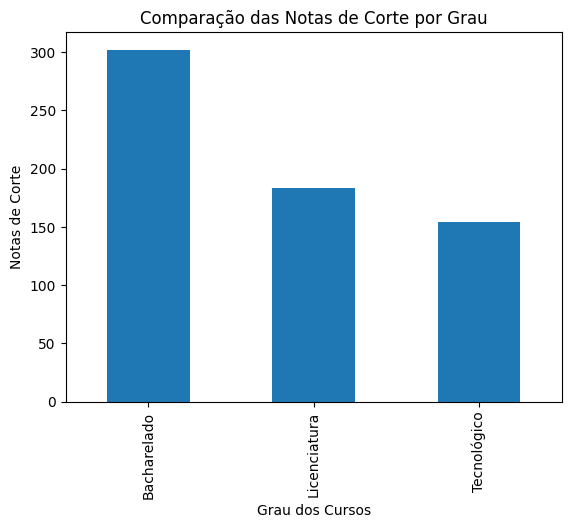

In [ ]:
#2- j) Gráfico comparativo entre o grau dos cursos (Bacharelado, Licenciatura, Tecnologia, etc) pelas Notas Integral de Cotas.

prouni['nota_integral_cotas'] = pd.to_numeric(prouni['nota_integral_cotas'], errors='coerce')

media_notas_corte = prouni.groupby('grau')['nota_integral_cotas'].mean()


fig, ax = plt.subplots()
media_notas_corte.plot(kind='bar', ax=ax)

ax.set_xlabel('Grau dos Cursos')
ax.set_ylabel('Notas de Corte')
ax.set_title('Comparação das Notas de Corte por Grau')

plt.show()